In [1]:
#importing the necessary libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
digits = load_digits()

In [2]:
#determining the total number of images and labels
print("Image data label", digits.data.shape)
print("Label data shape", digits.target.shape)

Image data label (1797, 64)
Label data shape (1797,)


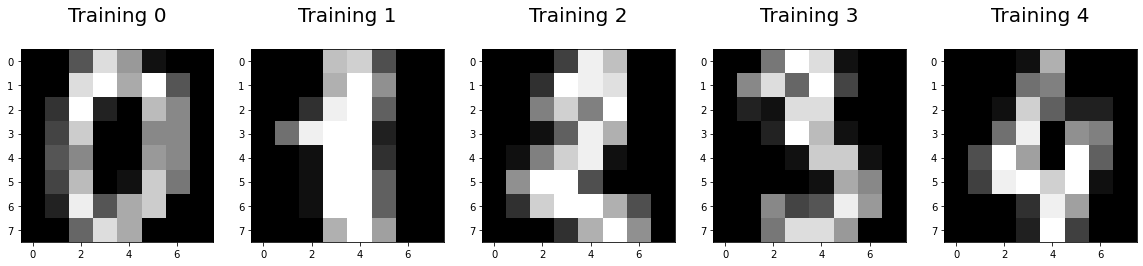

In [3]:
plt.figure(figsize = (20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training %i\n' %label,fontsize =20)

In [30]:
#dividing the data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,  y_test = train_test_split(digits.data, digits.target, test_size = 0.23, random_state = 0) 
#means we use 23% of data for testing

In [31]:
print(x_train.shape)
print(y_train.shape)

(1383, 64)
(1383,)


In [32]:
print(x_test.shape)
print(y_test.shape)

(414, 64)
(414,)


In [33]:
from sklearn.linear_model import LogisticRegression

In [35]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

C:\Users\HARISHMA NAIR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
#Returns a numpy array
#Predict for one observation (image)
print(logisticRegr.predict(x_test[0].reshape(1,-1)))

[2]


In [37]:
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [38]:
predictions = logisticRegr.predict(x_test)

In [39]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.961352657004831


In [40]:
#calculating using confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


In [42]:
cm = metrics.confusion_matrix(y_test, predictions) #labelled values (Known values), prediction
print(cm)

[[34  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  2]
 [ 0  0 40  1  0  0  0  0  0  0]
 [ 0  0  1 38  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  1  0  0]
 [ 0  0  0  0  0 41  0  0  0  2]
 [ 0  1  0  0  0  0 49  0  0  0]
 [ 0  0  0  0  1  0  0 44  0  0]
 [ 0  3  1  0  0  0  0  0 41  1]
 [ 0  0  0  0  0  1  0  0  0 42]]


Text(0.5, 1.0, 'Accuracy score : 0.961352657004831')

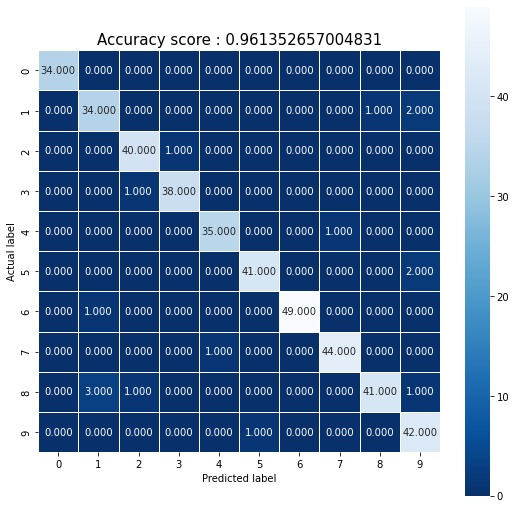

In [43]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot= True, fmt =".3f", linewidth = .5, square = True, cmap = 'Blues_r' )
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy score : {0}'.format(score)
plt.title(all_sample_title, size =15)

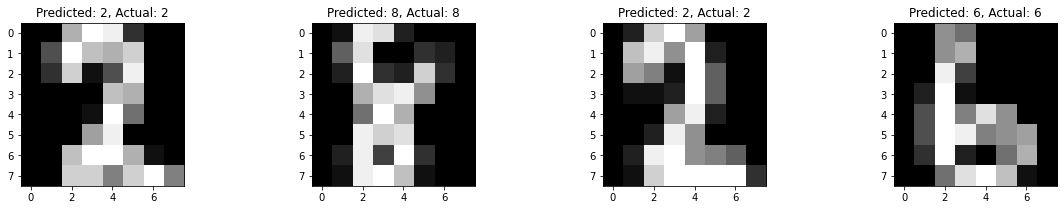

In [44]:
index =0
misclassifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict== actual:
        misclassifiedIndex.append(index)
    index +=1
plt.figure(figsize = (20,3))
for plotIndex, wrong in enumerate(misclassifiedIndex[0:4]):
    plt.subplot(1,4, plotIndex + 1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap = plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[wrong], y_test[wrong], fontsize = 20))